<a href="https://colab.research.google.com/github/Arx15E/University-Proyects/blob/main/Caracterizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Gestion riesgo operacional - EVERGREEN**
Espacio de trabajo en el cual se plantean el analisis de los riesgos asociados a las operaciones del negocio de la naviera EVERGREEN. Esta naviera taiwanesa opera en 240 puertos alrededor del mundo utilizando 150 buques canal de panamá.

Los riesgos operacionales a los cuales esta expuesta la naviera estan relacionandos con logistica portuaria, y este se describe a traves de dos variables aleatorias:

* Frecuencia: Indica el número de contenedores que se quedan en tierra por semana(tiempo)

* Severidad(KUSD): Indica el costo de solucionar cada evento de riesgo.

Es importante mencionar que el producto entre la severidad y la frecuencia da como resultado la distribución agregada de las perdidas. (LDA - Loss Distribution Approach ) y es precisamente que se hara la caracterizacion de esta distribución utilizando las medidas de tendencia central( Media, Desviacion) y las medidas de dispersion (Coeficiente de simetria,kurtusis)



0. Cargar las librerias de trabajo

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargan los archivos de trabajo

0        11.468562
1       128.418827
2        47.831980
3       162.867297
4       197.649353
           ...    
2799     10.453583
2800    106.315153
2801    100.971315
2802     25.253669
2803    101.806004
Length: 2804, dtype: float64


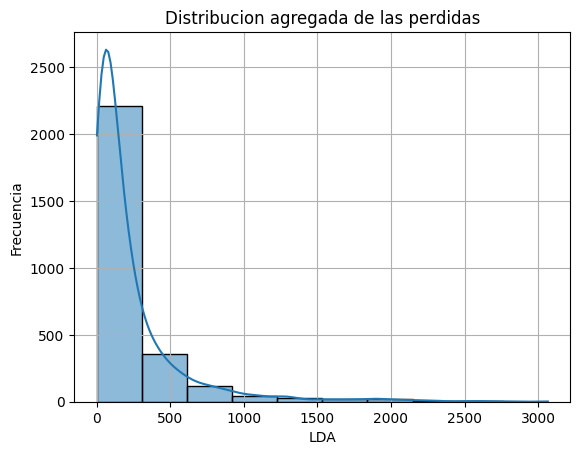

In [10]:
nxl='/content/drive/MyDrive/IntegraciónDatos/1. RiesgoOperacional_EVERGREEEN.xlsx'
datos = pd.read_excel(nxl, sheet_name=0)
datos.head(10)

# Procedemos con la construccion de la distribucion agregada de las perdidas
Freq=datos['Eventos (Semana)']
Sev=datos['Severidad (KUSD)']
LDA=Freq*Sev
print(LDA)

#Se procede con la construccion de la distribucion agregada de las perdidas
plt.figure()
sns.histplot(LDA, bins=10, kde=True)
plt.grid()
plt.xlabel('LDA')
plt.ylabel('Frecuencia')
plt.title('Distribucion agregada de las perdidas')
plt.show()

Coeficiente de asimetria mayor a 0

2. se procede con la clusterizacion estadistica. esta esta definida por el histograma de frecuencias

In [16]:
np.set_printoptions(suppress=True)
NI = 10  #indica el numero de clusters

counts,bin_edges=np.histogram(LDA,bins=NI)
print("El numero de datos por intervalo es:")
print(counts)
print("Los intervalos inferiores: ")
print(bin_edges[:-1])
print("Los intervalos superiores: ")
print(bin_edges[1:])
XC=(bin_edges[:-1]+bin_edges[1:])/2
print("Los centros de los intervalos son: ")
print(XC)

#Se configura la tabla
Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
df=pd.DataFrame(Tabla,columns=["LI", "LS","XC","ND"])
df.head(10)

El numero de datos por intervalo es:
[2209  356  116   46   27   18   20    7    4    1]
Los intervalos inferiores: 
[   2.59919687  308.92945016  615.25970344  921.58995673 1227.92021002
 1534.25046331 1840.5807166  2146.91096988 2453.24122317 2759.57147646]
Los intervalos superiores: 
[ 308.92945016  615.25970344  921.58995673 1227.92021002 1534.25046331
 1840.5807166  2146.91096988 2453.24122317 2759.57147646 3065.90172975]
Los centros de los intervalos son: 
[ 155.76432351  462.0945768   768.42483009 1074.75508338 1381.08533666
 1687.41558995 1993.74584324 2300.07609653 2606.40634981 2912.7366031 ]


,LI,LS,XC,ND
0,2.599197,308.929450,155.764324,2209.0
1,308.929450,615.259703,462.094577,356.0
2,615.259703,921.589957,768.424830,116.0
3,921.589957,1227.920210,1074.755083,46.0
4,1227.920210,1534.250463,1381.085337,27.0
5,1534.250463,1840.580717,1687.415590,18.0
6,1840.580717,2146.910970,1993.745843,20.0
7,2146.910970,2453.241223,2300.076097,7.0
8,2453.241223,2759.571476,2606.406350,4.0
9,2759.571476,3065.901730,2912.736603,1.0


3. se calculan la tendencia central y dispersion, media, desviacion, asimetria y kurtosis

In [21]:
from scipy.stats import kurtosis, skew

u=np.mean(LDA)
var=np.var(LDA)
sigma=np.std(LDA)
Ida_skew = skew(LDA)
Ida_kurt = kurtosis(LDA)

T2=np.column_stack((u,var,sigma, Ida_skew, Ida_kurt))
df2=pd.DataFrame(T2,columns=["Media","Varianza","Desviacion", "Asimetria", "Kurtosis"])
df2.head(10)

,Media,Varianza,Desviacion,Asimetria,Kurtosis
0,231.266602,115581.511672,339.97281,3.389058,14.577132


**Analisis de resultados**

De las metricas de tendencia central y dispersion, podemos observar que los datos tienen la tendencia a ubicarse por debajo de la media como lo muestra el coeficiente de asimetria(3.389058) , el cual esta por encima de la unidad, lo que indica que en general las perdidas por dejar contenedores en tierra son perdidas menores( no asegurables). por su parte el coeficiente de curtosis, muestra que los datos se encuentran muy concentrados al lado izquierdo de la media de la distribucion de perdidas, tal y como se puede observar en la grafica del histograma de frecuencias, esto refuerza la idea de menores perdidas
